<a href="https://colab.research.google.com/github/shahchhatru/AI_colab_notebooks/blob/main/pytorchGeometricGraphDataparsing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torch_geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 8.0 MB/s eta 0:00:00


In [ ]:
import numpy as np
import torch
import torch_geometric.datasets as datasets
import torch_geometric.data as data
import torch_geometric.transforms as transforms
import networkx as nx
from torch_geometric.utils.convert import to_networkx

# Data

let's create a dummy graph

In [ ]:
embeddings=torch.rand((100,10),dtype=torch.float)
embeddings

tensor([[0.8010, 0.9403, 0.8289, 0.1164, 0.3102, 0.9599, 0.0815, 0.9252, 0.2515,
         0.6772],
        [0.8787, 0.2437, 0.2677, 0.0442, 0.2119, 0.0129, 0.2829, 0.0198, 0.5569,
         0.5372],
        [0.7557, 0.6525, 0.7998, 0.1368, 0.1441, 0.1821, 0.3990, 0.4528, 0.8053,
         0.6082],
        [0.2219, 0.3365, 0.6668, 0.2444, 0.0081, 0.1500, 0.1536, 0.9465, 0.8043,
         0.3141],
        [0.3500, 0.2455, 0.2169, 0.1235, 0.3552, 0.3223, 0.7264, 0.9140, 0.4948,
         0.7912],
        [0.2106, 0.8696, 0.0597, 0.6395, 0.7895, 0.2314, 0.5077, 0.8699, 0.9611,
         0.5964],
        [0.3049, 0.0611, 0.7771, 0.3364, 0.1654, 0.5659, 0.6797, 0.4768, 0.7679,
         0.9876],
        [0.6125, 0.9572, 0.5573, 0.3337, 0.5210, 0.1554, 0.6512, 0.2344, 0.0746,
         0.3282],
        [0.0991, 0.2029, 0.0802, 0.2582, 0.4885, 0.3486, 0.4113, 0.5819, 0.3864,
         0.5848],
        [0.3011, 0.9251, 0.0230, 0.0551, 0.9845, 0.2097, 0.9189, 0.0979, 0.0926,
         0.6944],
        [0

In [ ]:
embeddings.shape

torch.Size([100, 10])

In [ ]:
rows =np.random.choice(100,500)
columns=np.random.choice(100,500)


In [ ]:
rows.size, columns.size

(500, 500)

In [ ]:
rows

array([87, 23, 54, 73, 88, 32, 15, 16, 35, 82, 66, 64, 25, 24, 15,  5, 34,
       38, 58,  4, 85, 31, 92, 86, 70, 39, 28, 57, 73, 12, 38, 81, 99, 96,
       77,  5, 83, 12, 16, 52, 41,  2, 98, 66, 92, 38, 90, 47,  3, 55,  3,
       31, 89, 34, 75, 61, 17, 28, 59, 36, 20, 77, 27, 29, 12, 51,  9, 63,
       90, 94,  3, 64, 10, 31, 21, 74, 50, 92, 31,  6,  7, 41, 11, 24, 91,
       94, 48, 84, 86, 42, 37,  4, 91, 95, 37, 29, 75, 26,  1, 41, 63,  2,
       43, 80, 62, 84,  3, 88,  4,  2, 64, 71, 60,  7, 79, 99, 32, 86, 97,
       41, 94, 86, 39, 62, 49, 46,  0, 49, 57,  3, 76, 21, 28, 99, 34, 62,
       50,  8, 42, 99, 95, 44, 70, 89, 66, 26, 49, 84, 24, 98, 88, 34, 48,
       34, 15, 73, 69, 61, 88, 53,  5, 78, 70,  2, 64, 31,  2, 40, 71, 14,
        7, 51, 91, 67, 29, 88, 68, 18, 41, 50, 89, 10, 20, 53,  1, 81, 42,
       76, 34, 84, 18, 25, 62, 58,  7, 14, 63, 12, 45, 20,  1, 34, 54, 70,
       69, 81, 84, 22, 28, 47, 40, 21, 39,  3, 82, 78, 77, 37, 36,  0, 57,
       58,  0, 76, 84, 76

In [ ]:
columns

array([49, 94, 32, 11, 52, 46, 68, 47, 58, 73,  7, 63, 40, 60, 86, 46, 51,
       74, 46, 99, 47, 31, 11, 87, 94, 73, 17, 36, 35, 37, 32, 50, 38, 13,
       91, 11, 50, 63, 84, 40, 87,  8, 45,  7, 77, 22, 36, 24, 89, 35,  1,
       47, 51, 70, 74, 87, 73, 74, 52, 93, 80, 93, 53, 70, 52, 23, 63, 10,
        3, 47, 62, 62, 39, 67, 36, 89, 99, 43, 87, 47, 32, 94, 99, 99, 14,
       80, 36, 53, 69, 96, 58, 34, 98, 79,  0, 17, 83, 27, 11, 52, 88, 93,
       45, 83, 54, 91, 29, 18, 87, 86, 71, 49, 80, 29, 62, 94, 48, 17, 49,
       60, 19,  6, 65, 90, 98, 43, 65, 68, 37,  2, 67, 53, 90, 30, 27, 19,
       46, 44, 42, 94, 17, 44, 87, 58, 55,  8, 75, 48, 33, 40, 10, 77, 57,
       96,  4, 13,  9, 28, 16, 23, 85, 19, 65, 69, 89, 90, 34, 54, 88, 55,
       99, 44, 22, 78,  4, 50, 21,  1, 75, 22, 24, 90, 90, 10, 95, 63, 87,
       98, 86, 96, 17, 78, 26,  1, 35, 22, 42,  3, 17,  2,  8, 39, 50, 40,
       11, 13, 47, 18, 84, 79, 19,  8, 37, 94, 65, 72,  4, 52, 42,  8, 56,
       51, 57, 96, 14, 73

In [14]:
edges=torch.tensor([rows,columns])

<ipython-input-14-f5623561d267>:1: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:261.)
  edges=torch.tensor([rows,columns])


In [15]:
edges

tensor([[87, 23, 54, 73, 88, 32, 15, 16, 35, 82, 66, 64, 25, 24, 15,  5, 34, 38,
         58,  4, 85, 31, 92, 86, 70, 39, 28, 57, 73, 12, 38, 81, 99, 96, 77,  5,
         83, 12, 16, 52, 41,  2, 98, 66, 92, 38, 90, 47,  3, 55,  3, 31, 89, 34,
         75, 61, 17, 28, 59, 36, 20, 77, 27, 29, 12, 51,  9, 63, 90, 94,  3, 64,
         10, 31, 21, 74, 50, 92, 31,  6,  7, 41, 11, 24, 91, 94, 48, 84, 86, 42,
         37,  4, 91, 95, 37, 29, 75, 26,  1, 41, 63,  2, 43, 80, 62, 84,  3, 88,
          4,  2, 64, 71, 60,  7, 79, 99, 32, 86, 97, 41, 94, 86, 39, 62, 49, 46,
          0, 49, 57,  3, 76, 21, 28, 99, 34, 62, 50,  8, 42, 99, 95, 44, 70, 89,
         66, 26, 49, 84, 24, 98, 88, 34, 48, 34, 15, 73, 69, 61, 88, 53,  5, 78,
         70,  2, 64, 31,  2, 40, 71, 14,  7, 51, 91, 67, 29, 88, 68, 18, 41, 50,
         89, 10, 20, 53,  1, 81, 42, 76, 34, 84, 18, 25, 62, 58,  7, 14, 63, 12,
         45, 20,  1, 34, 54, 70, 69, 81, 84, 22, 28, 47, 40, 21, 39,  3, 82, 78,
         77, 37, 36,  0, 57,

In [16]:
edges_attr=np.random.choice(3,500)
edges_attr

array([1, 2, 2, 0, 1, 2, 1, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 2, 1, 0,
       0, 1, 0, 2, 1, 1, 1, 2, 0, 2, 1, 2, 1, 0, 2, 1, 0, 1, 2, 1, 1, 1,
       2, 2, 1, 2, 2, 1, 1, 2, 0, 2, 1, 2, 0, 0, 1, 1, 0, 0, 2, 0, 1, 1,
       1, 0, 0, 2, 2, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 2, 2, 1, 0, 1, 0,
       0, 2, 1, 2, 2, 0, 0, 0, 1, 0, 0, 1, 1, 0, 2, 2, 1, 1, 1, 1, 2, 0,
       2, 1, 1, 2, 2, 1, 0, 0, 0, 1, 1, 0, 1, 2, 1, 2, 0, 0, 2, 2, 0, 0,
       0, 2, 0, 2, 1, 1, 1, 1, 2, 2, 1, 0, 2, 2, 2, 0, 1, 0, 0, 0, 0, 2,
       2, 0, 0, 0, 2, 0, 2, 1, 2, 0, 2, 1, 0, 0, 1, 2, 2, 1, 2, 1, 1, 1,
       1, 2, 2, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2,
       0, 1, 0, 1, 1, 1, 2, 0, 2, 0, 1, 1, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2,
       1, 1, 1, 2, 2, 1, 1, 0, 2, 1, 2, 1, 0, 0, 2, 1, 1, 1, 1, 2, 1, 1,
       1, 0, 1, 0, 2, 1, 1, 1, 2, 0, 0, 0, 2, 0, 1, 2, 0, 2, 2, 0, 1, 2,
       1, 2, 0, 1, 2, 2, 0, 0, 0, 2, 1, 1, 1, 2, 1, 0, 2, 2, 0, 0, 0, 2,
       2, 0, 0, 1, 0, 0, 1, 0, 2, 2, 2, 0, 0, 0, 1,

In [17]:
ys=torch.rand((100)).round().long()
ys

tensor([1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
        1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
        1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
        1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
        0, 1, 0, 1])

## creating Graph

In [20]:
graph=data.Data(x=embeddings,edge_index=edges,edge_attr=edges_attr,y=ys)
graph

Data(x=[100, 10], edge_index=[2, 500], edge_attr=[500], y=[100])

In [21]:
for prop in graph:
  print(prop)

('x', tensor([[0.8010, 0.9403, 0.8289, 0.1164, 0.3102, 0.9599, 0.0815, 0.9252, 0.2515,
         0.6772],
        [0.8787, 0.2437, 0.2677, 0.0442, 0.2119, 0.0129, 0.2829, 0.0198, 0.5569,
         0.5372],
        [0.7557, 0.6525, 0.7998, 0.1368, 0.1441, 0.1821, 0.3990, 0.4528, 0.8053,
         0.6082],
        [0.2219, 0.3365, 0.6668, 0.2444, 0.0081, 0.1500, 0.1536, 0.9465, 0.8043,
         0.3141],
        [0.3500, 0.2455, 0.2169, 0.1235, 0.3552, 0.3223, 0.7264, 0.9140, 0.4948,
         0.7912],
        [0.2106, 0.8696, 0.0597, 0.6395, 0.7895, 0.2314, 0.5077, 0.8699, 0.9611,
         0.5964],
        [0.3049, 0.0611, 0.7771, 0.3364, 0.1654, 0.5659, 0.6797, 0.4768, 0.7679,
         0.9876],
        [0.6125, 0.9572, 0.5573, 0.3337, 0.5210, 0.1554, 0.6512, 0.2344, 0.0746,
         0.3282],
        [0.0991, 0.2029, 0.0802, 0.2582, 0.4885, 0.3486, 0.4113, 0.5819, 0.3864,
         0.5848],
        [0.3011, 0.9251, 0.0230, 0.0551, 0.9845, 0.2097, 0.9189, 0.0979, 0.0926,
         0.6944],
    

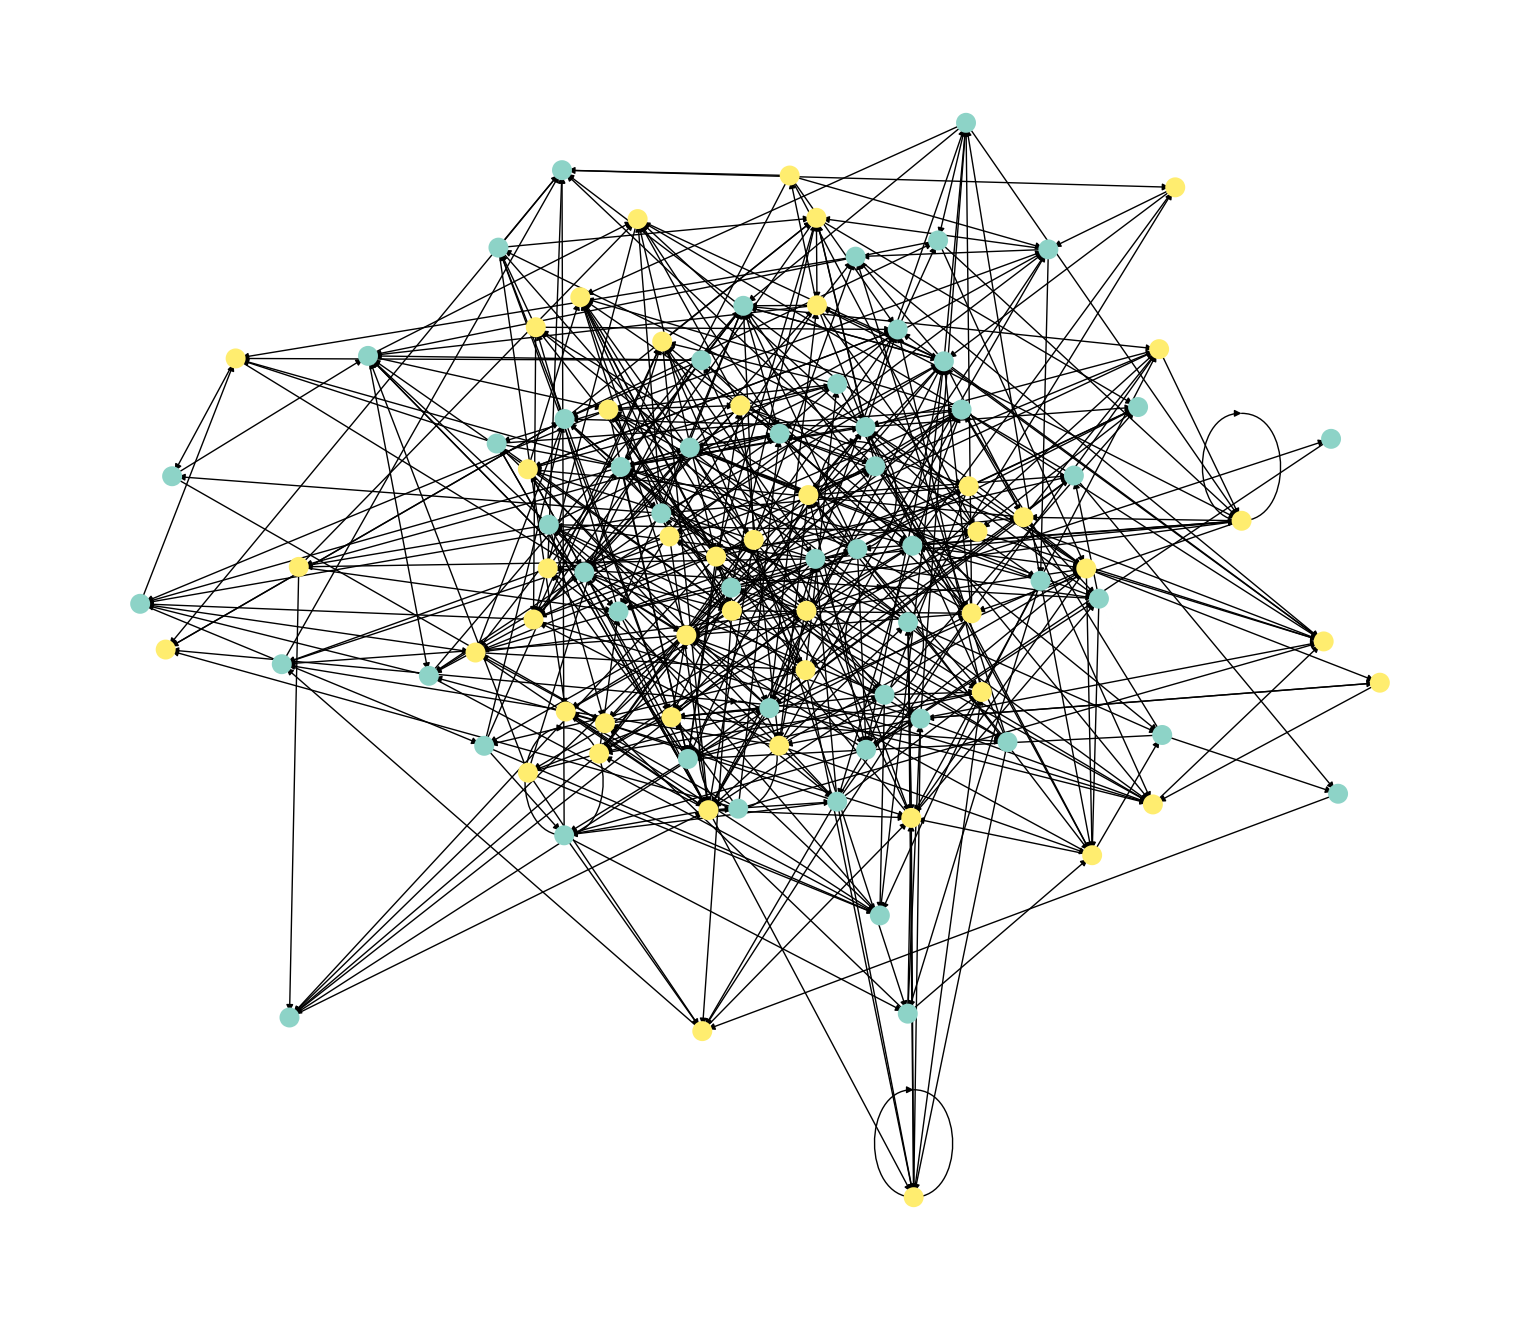

In [25]:
vis = to_networkx(graph)

node_labels=graph.y.numpy()

import matplotlib.pyplot as plt
plt.figure(1,figsize=(15,13))
nx.draw(vis,cmap=plt.get_cmap('Set3'),node_color=node_labels,node_size=70,linewidths=6)
plt.draw()

# Batch

With batch object we can represent multiple graph with single disconnected graph,

In [26]:
graph2=graph


In [27]:
batch=data.Batch().from_data_list([graph,graph2])

In [28]:
print("Number of graphs",batch.num_graphs)
print("Graph at index 1", batch[1])
print("Retrieve the list of graphs:\n", len(batch.to_data_list()))

Number of graphs 2
Graph at index 1 Data(x=[100, 10], edge_index=[2, 500], edge_attr=[500], y=[100])
Retrieve the list of graphs:
 2


# Datasets


In [29]:
datasets.__all__

['KarateClub',
 'TUDataset',
 'GNNBenchmarkDataset',
 'Planetoid',
 'NELL',
 'CitationFull',
 'CoraFull',
 'Coauthor',
 'Amazon',
 'PPI',
 'Reddit',
 'Reddit2',
 'Flickr',
 'Yelp',
 'AmazonProducts',
 'QM7b',
 'QM9',
 'MD17',
 'ZINC',
 'AQSOL',
 'MoleculeNet',
 'PCQM4Mv2',
 'Entities',
 'RelLinkPredDataset',
 'GEDDataset',
 'AttributedGraphDataset',
 'MNISTSuperpixels',
 'FAUST',
 'DynamicFAUST',
 'ShapeNet',
 'ModelNet',
 'CoMA',
 'SHREC2016',
 'TOSCA',
 'PCPNetDataset',
 'S3DIS',
 'GeometricShapes',
 'BitcoinOTC',
 'GDELTLite',
 'ICEWS18',
 'GDELT',
 'WILLOWObjectClass',
 'PascalVOCKeypoints',
 'PascalPF',
 'SNAPDataset',
 'SuiteSparseMatrixCollection',
 'WordNet18',
 'WordNet18RR',
 'FB15k_237',
 'WikiCS',
 'WebKB',
 'WikipediaNetwork',
 'HeterophilousGraphDataset',
 'Actor',
 'UPFD',
 'GitHub',
 'FacebookPagePage',
 'LastFMAsia',
 'DeezerEurope',
 'GemsecDeezer',
 'Twitch',
 'Airports',
 'LRGBDataset',
 'MalNetTiny',
 'OMDB',
 'PolBlogs',
 'EmailEUCore',
 'LINKXDataset',
 'Elliptic

In [33]:
name="Cora"
transform=transforms.Compose(
    [
        transforms.RandomNodeSplit('train_rest',num_val=500,num_test=300),
        transforms.TargetIndegree(),
    ]
)

cora=datasets.Planetoid('./data',name,pre_transform=transforms.NormalizeFeatures(),transform=transform)


Processing...
Done!


In [34]:
cora

Cora()

In [35]:
aids=datasets.TUDataset(root="./data",name="AIDS")
aids

Extracting data/AIDS/AIDS.zip
Processing...
Done!


AIDS(2000)

In [38]:
print("AIDS Info")
print("# of graph", len(aids))
print("# classes graphs",aids.num_classes)
print("# edge features",aids.num_edge_features)
print("# edge labels",aids.num_edge_labels)
print("# node features",aids.num_node_features)


AIDS Info
# of graph 2000
# classes graphs 2
# edge features 3
# edge labels 3
# node features 38


In [39]:
print("Cora info")
print('# of graph',len(cora))
print("# classes (nodes)",cora.num_classes)
print("# edge feature",cora.num_edge_features)
print("# node features", cora.num_node_features)

Cora info
# of graph 1
# classes (nodes) 7
# edge feature 1
# node features 1433


In [40]:
aids.data

/usr/local/lib/python3.10/dist-packages/torch_geometric/data/in_memory_dataset.py:284: UserWarning: It is not recommended to directly access the internal storage format `data` of an 'InMemoryDataset'. The data of the dataset is already cached, so any modifications to `data` will not be reflected when accessing its elements. Clearing the cache now by removing all elements in `dataset._data_list`. If you are absolutely certain what you are doing, access the internal storage via `InMemoryDataset._data` instead to suppress this warning. Alternatively, you can access stacked individual attributes of every graph via `dataset.{attr_name}`.
  warnings.warn(msg)


Data(x=[31385, 38], edge_index=[2, 64780], edge_attr=[64780, 3], y=[2000])

In [41]:
aids[0]

Data(edge_index=[2, 106], x=[47, 38], edge_attr=[106, 3], y=[1])

In [42]:
cora.data

/usr/local/lib/python3.10/dist-packages/torch_geometric/data/in_memory_dataset.py:284: UserWarning: It is not recommended to directly access the internal storage format `data` of an 'InMemoryDataset'. If you are absolutely certain what you are doing, access the internal storage via `InMemoryDataset._data` instead to suppress this warning. Alternatively, you can access stacked individual attributes of every graph via `dataset.{attr_name}`.
  warnings.warn(msg)


Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])

In [43]:
cora[0]

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708], edge_attr=[10556, 1])

In [44]:
cora_loader=data.DataLoader(cora)

/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:22: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


In [45]:
for l in cora_loader:
  print(l)
  break

DataBatch(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708], edge_attr=[10556, 1], batch=[2708], ptr=[2])
